# Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# Importing Dataset

In [2]:
housingData = pd.read_csv('housingData.csv')
print(housingData)
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [3]:
#checking the number of rows and columns
housingData.shape

(506, 14)

# Data Analysis

In [4]:
#check for misssing values
housingData.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
#as we see above, there are lots of missing values which need to be fixed.
#since the dataset is relatively small, we will replace the missinng(NaN values) with mean

meanValues = housingData.mean()
newHousingData = housingData.fillna(meanValues)# replaces null values with mean values

housingData = newHousingData
housingData

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


In [8]:
housingData.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
housingData.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


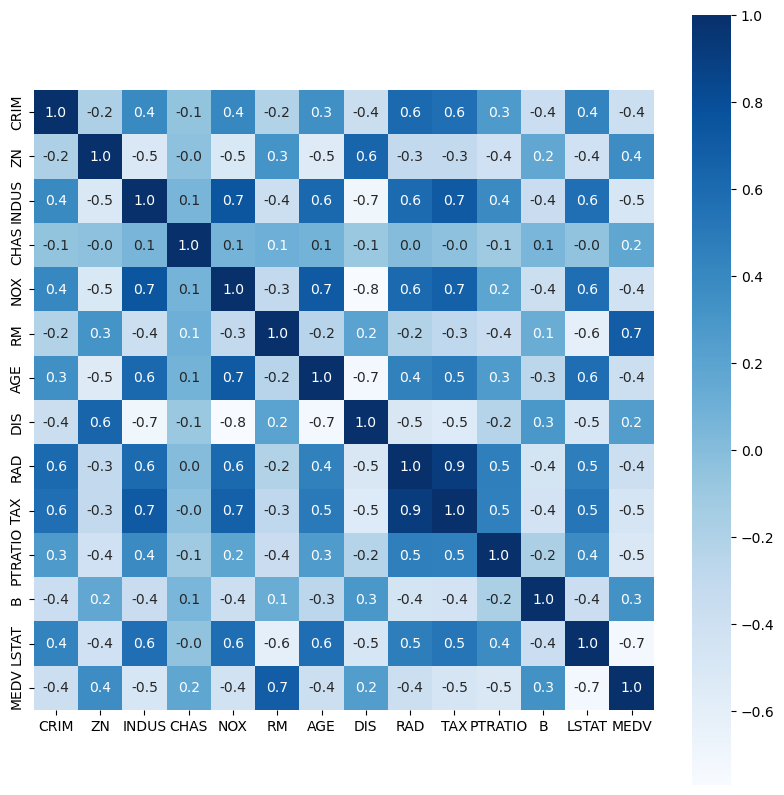

In [18]:
#under standing Correlation between features
correlation = housingData.corr()

plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':10}, cmap = 'Blues')
plt.show()

# Splitting The Data


In [19]:
X = housingData.drop(['MEDV'], axis = 1)
Y = housingData['MEDV']

In [20]:
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.200000  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.900000  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.100000  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.800000  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.200000  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...        ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.100000  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.700000  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.000000  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.300000  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030  68.518519  2.5050    1  273   

     PTRATIO       B      LSTAT  
0       15.3  396.90   4.9800

In [43]:
#Splitting into Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 2)

print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(506, 13) (455, 13) (51, 13)
(506,) (455,) (51,)


# Model Training

In [44]:
#here we are using XGBoost Algorithm
model = XGBRegressor()

In [45]:
#fitting the model to data(trainig thr model with X_train)
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [46]:
trainingDataPrediction = model.predict(X_train)
trainingDataPrediction

array([30.691977 ,  5.0242195, 35.388367 , 27.894735 , 18.381298 ,
       18.523163 , 17.507347 , 15.624145 , 22.38983  , 20.30356  ,
       20.612928 , 19.782734 , 28.207535 , 35.10918  , 27.495731 ,
       48.517593 , 27.477716 , 11.461855 , 22.00328  , 13.205033 ,
        7.4084797, 20.579731 , 20.09184  , 25.141666 , 21.984251 ,
       19.114452 , 24.288286 , 19.396742 , 23.908484 , 34.90338  ,
       19.37569  , 21.40942  , 26.619455 , 37.583385 , 35.99722  ,
       21.366106 , 23.607197 , 24.829939 , 19.898172 , 20.863348 ,
       18.222895 , 10.890101 , 43.998543 , 43.504765 ,  8.333066 ,
       46.701557 , 32.906902 , 21.710777 , 14.349812 , 29.100832 ,
       23.752592 , 23.177029 , 20.994745 , 20.09974  , 34.687134 ,
       13.901929 , 13.513882 , 21.99751  , 15.191797 , 10.903316 ,
       22.715582 , 13.799815 ,  5.5970225, 29.808853 , 49.99731  ,
       34.854496 , 20.606714 , 23.389088 , 19.185268 , 32.696278 ,
       19.60605  , 27.013157 ,  8.402109 , 46.000904 , 21.7168

In [47]:
#comparing X_train output to Y_train output using rSquared error and mean Squared error
score1 = metrics.r2_score(Y_train, trainingDataPrediction)

score2 = metrics.mean_absolute_error(Y_train, trainingDataPrediction)

In [48]:
print("RSquared Error: ",score1)# Higher R Squared value = better accuracy
print("Mean Absolute Error", score2) #lower mean absolute error = better accuracy

RSquared Error:  0.9999927877815601
Mean Absolute Error 0.016866812234396417


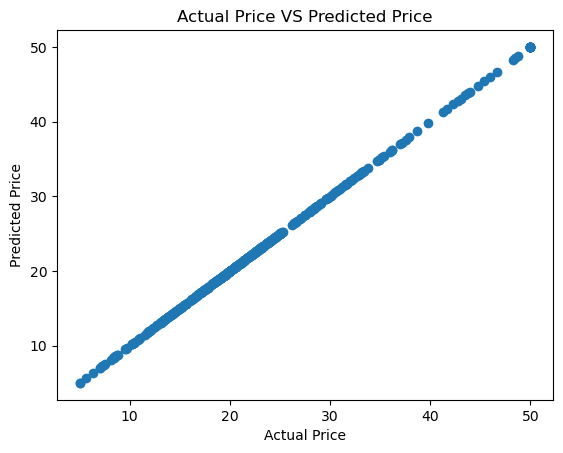

In [49]:
plt.scatter(Y_train, trainingDataPrediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price VS Predicted Price')
plt.show()

In [50]:
#prediction on test data
testDataPrediction = model.predict(X_test)
testDataPrediction

array([20.39357  , 20.670738 , 31.251787 , 30.453854 , 10.760827 ,
       14.167377 , 26.849396 , 27.760038 , 23.303982 , 21.90238  ,
       27.075066 , 24.906761 , 20.539778 , 25.066631 , 27.007635 ,
       23.468231 , 19.40358  , 10.589026 ,  8.302611 , 15.071736 ,
       22.11565  , 21.012133 , 33.271732 , 18.864372 , 14.103847 ,
       19.12909  , 46.06091  , 31.073576 , 34.745735 , 18.214594 ,
       19.765858 , 19.613543 , 29.405367 , 23.842627 , 10.088233 ,
       16.747293 ,  8.152107 , 19.997372 , 21.873018 , 21.614857 ,
       26.214891 , 14.145078 , 32.09998  ,  7.2671843, 20.238903 ,
       16.289915 , 35.370506 , 15.047243 , 30.719105 , 12.244762 ,
       27.06474  ], dtype=float32)

In [51]:
score1 = metrics.r2_score(Y_test, testDataPrediction)

score2 = metrics.mean_absolute_error(Y_test, testDataPrediction)

In [52]:
print("RSquared Error: ",score1)# Higher R Squared value = better accuracy
print("Mean Absolute Error", score2) #lower mean absolute error = better accuracy

RSquared Error:  0.8309977563998261
Mean Absolute Error 2.5803552515366497


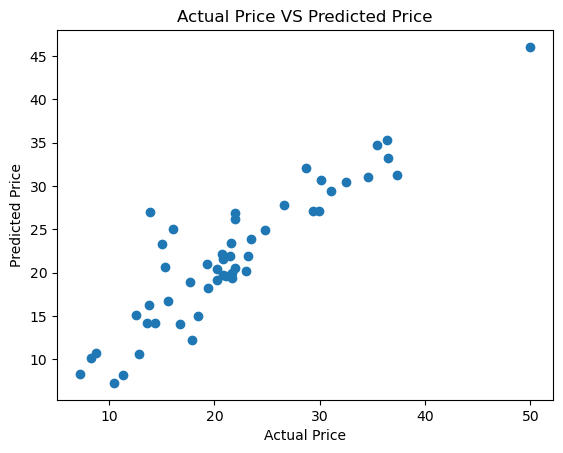

In [53]:
plt.scatter(Y_test, testDataPrediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price VS Predicted Price')
plt.show()